# Loan Data from propser

## Preliminary Wrangling

This document explores a dataset containing  information of  113,937 loans with 81 variables on each loan,  including loan amount, borrower rate (or interest rate), current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information. 

In [379]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [380]:
# load in the dataset into a pandas dataframe, print statistics
loan_data = pd.read_csv('prosperLoanData.csv')

In [381]:
# high-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.dtypes)
print(loan_data.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [382]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [383]:
list=[]
list.append(loan_data.columns)
list

[Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
        'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
        'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
        'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
        'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
        'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
        'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
        'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',


This is a great dataset,  my point of consideration is how APR is changed over various other parameters. I am slicing a dataset which will be useful for my exploration 

In [384]:
# Choose the columns for this particular analysis. 
cols= [ 'ListingCreationDate','ListingCategory (numeric)', 'CreditGrade',
        'Term', 'LoanStatus',  'BorrowerAPR', 'BorrowerRate',
         'ProsperRating (Alpha)',
        'ProsperScore',
        'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
        'DebtToIncomeRatio', 'IncomeRange', 
        'StatedMonthlyIncome','MonthlyLoanPayment', 'LoanOriginalAmount'
        ]
loan = loan_data[cols]

In [385]:
loan.head()

,ListingCreationDate,ListingCategory (numeric),CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,0,C,36,Completed,0.16516,0.1580,NaN,NaN,Other,Self-employed,2.0,0.17,"$25,000-49,999",3083.333333,330.43,9425
1,2014-02-27 08:28:07.900000000,2,NaN,36,Current,0.12016,0.0920,A,7.0,Professional,Employed,44.0,0.18,"$50,000-74,999",6125.000000,318.93,10000
2,2007-01-05 15:00:47.090000000,0,HR,36,Completed,0.28269,0.2750,NaN,NaN,Other,Not available,NaN,0.06,Not displayed,2083.333333,123.32,3001
3,2012-10-22 11:02:35.010000000,16,NaN,36,Current,0.12528,0.0974,A,9.0,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",2875.000000,321.45,10000
4,2013-09-14 18:38:39.097000000,2,NaN,36,Current,0.24614,0.2085,D,4.0,Executive,Employed,44.0,0.26,"$100,000+",9583.333333,563.97,15000


Explantion on Listing Category

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [386]:
# Rename values in the listing category with the names
mapping = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
loan = loan.replace({'ListingCategory (numeric)': mapping})


In [387]:
# descriptive statistics for numeric variables
print(loan.describe())
loan['ListingCategory (numeric)'].value_counts()

                Term    BorrowerAPR   BorrowerRate  ProsperScore  \
count  113937.000000  113912.000000  113937.000000  84853.000000   
mean       40.830248       0.218828       0.192764      5.950067   
std        10.436212       0.080364       0.074818      2.376501   
min        12.000000       0.006530       0.000000      1.000000   
25%        36.000000       0.156290       0.134000      4.000000   
50%        36.000000       0.209760       0.184000      6.000000   
75%        36.000000       0.283810       0.250000      8.000000   
max        60.000000       0.512290       0.497500     11.000000   

       EmploymentStatusDuration  DebtToIncomeRatio  StatedMonthlyIncome  \
count             106312.000000      105383.000000         1.139370e+05   
mean                  96.071582           0.275947         5.608026e+03   
std                   94.480605           0.551759         7.478497e+03   
min                    0.000000           0.000000         0.000000e+00   
25%         

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [388]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [389]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
ListingCreationDate          113937 non-null object
ListingCategory (numeric)    113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
LoanOriginalAmount           113937 non-null int64
dty

Checking for any loan with null amount

### What is the structure of your dataset?

This document explores a dataset containing information of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the intrest rates and apr of the loan in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that loan type has an effect on apr, and apr is higher for loans which are less essential. Other factors i would like to explore is the income levels, and credit ratings. 

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Loan APR. 

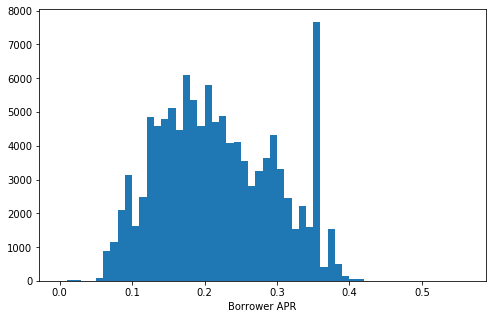

In [390]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title(' Spread of APR')

APR is distributed unevenly, there is a peak near 0.1 and there is peak at 0.39. Need to explore the various factors that cause this variation. 


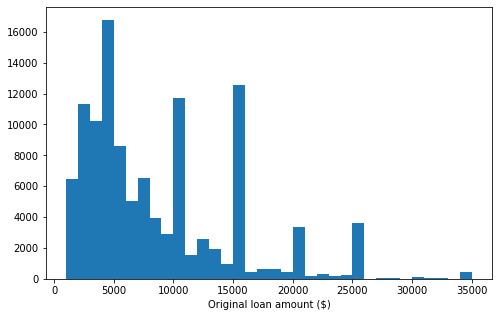

In [391]:
# Investigating Loan Original Amount on a higher bin size
bins = np.arange(1000, loan.LoanOriginalAmount.max()+200, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

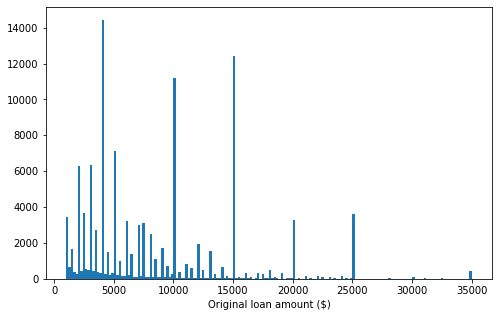

In [392]:
# Investigating on a lower bin size
bins = np.arange(1000, loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

There are very large spike at multiple points. People tend to borrow amounts in multiples of 5000

In [393]:
loan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [394]:

# We can classify the people as diffrent income levels. 
def income(row):
    if row["StatedMonthlyIncome"]<2100:
        return 'Low'
    if row["StatedMonthlyIncome"]>=2100 and row["StatedMonthlyIncome"]<4200:
        return 'Medium'
    if row["StatedMonthlyIncome"]>=4200 and row["StatedMonthlyIncome"]<6250:
        return 'High'
    else:
        return 'Very High'

In [395]:
loan["Income_Level"] = loan.apply(income, axis=1);
print(loan['ListingCategory (numeric)'].value_counts())
loan['ProsperRating (Alpha)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64


C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [422]:
#For further analysis i need to engineer some categorical variables.

# Convert each categoric vars  into ordered categorical types
list2 = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',
       'Business', 'Auto', 'Personal Loan', 'Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
       'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
ordered_list = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = list2)
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype(ordered_list)
# Income. Level
income_order = ['Low', 'Medium', 'High', ' Very High']
ordered = pd.api.types.CategoricalDtype(ordered =True, categories = income_order)
loan['Income_Level'] = loan['Income_Level'].astype(ordered)
# Prosper Rating
list_order = list_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosper_list = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = list_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(prosper_list)

loan.sample(20)

# save this dataset. 

loan.to_csv('loan.csv', encoding='utf-8', index=False)

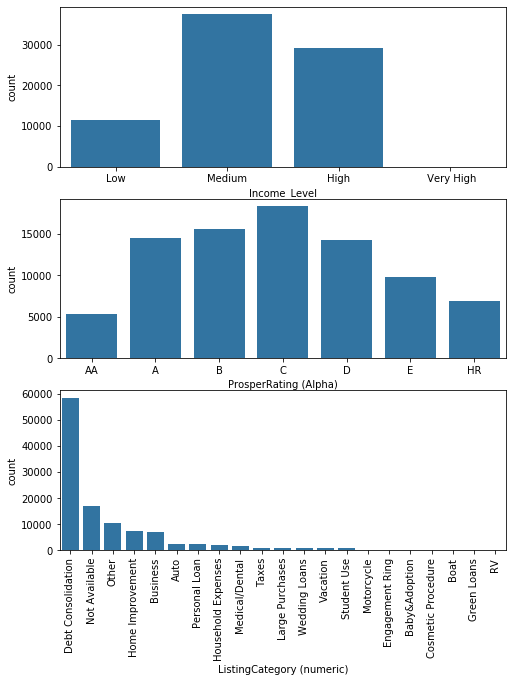

In [423]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'Income_Level', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1]);
sb.countplot(data = loan, x = 'ListingCategory (numeric)', color = default_color, ax = ax[2])

plt.xticks(rotation=90);

The maximum loans are for debt consolidation, more data is available for such type of loans. The higher propser rating people tend to take fewer loans, but the loan amount need to condidered to see who takes higher amounts. Low income groups tend to take fewer loans. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The APR distribution appears to be multimodal. I did not have to do any transformations. There were no unusual points in particular. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I added the names of the loan types. Two coloumns I  have converted into catergorical data type. 

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [398]:
loan.head()

,ListingCreationDate,ListingCategory (numeric),CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,Income_Level
0,2007-08-26 19:09:29.263000000,Not Available,C,36,Completed,0.16516,0.1580,NaN,NaN,Other,Self-employed,2.0,0.17,"$25,000-49,999",3083.333333,330.43,9425,Medium
1,2014-02-27 08:28:07.900000000,Home Improvement,NaN,36,Current,0.12016,0.0920,A,7.0,Professional,Employed,44.0,0.18,"$50,000-74,999",6125.000000,318.93,10000,High
2,2007-01-05 15:00:47.090000000,Not Available,HR,36,Completed,0.28269,0.2750,NaN,NaN,Other,Not available,NaN,0.06,Not displayed,2083.333333,123.32,3001,Low
3,2012-10-22 11:02:35.010000000,Motorcycle,NaN,36,Current,0.12528,0.0974,A,9.0,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",2875.000000,321.45,10000,Medium
4,2013-09-14 18:38:39.097000000,Home Improvement,NaN,36,Current,0.24614,0.2085,D,4.0,Executive,Employed,44.0,0.26,"$100,000+",9583.333333,563.97,15000,NaN


In [399]:
numeric_vars = ['MonthlyLoanPayment', 'BorrowerAPR','LoanOriginalAmount']
categoric_vars = [ 'ProsperRating (Alpha)', 'Income_Level','ListingCategory (numeric)']

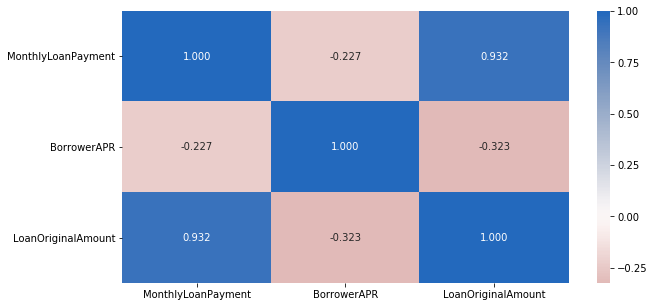

In [400]:
# correlation plot
plt.figure(figsize = [10, 5])
ax = sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0 )
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

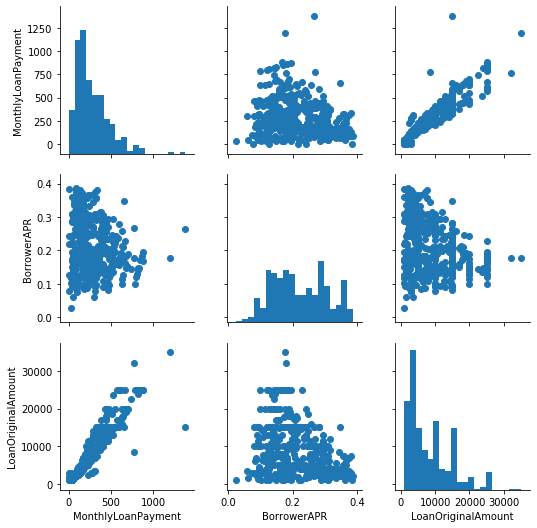

In [401]:
# plot matrix: sample 5000 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(loan.shape[0], 500, replace = False)
loan_samp = loan.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The correlation and the scatter plots both shows that there is negative correlation between APR and loan amount. Loan amount and monthly payments are positively correlated. 

We can further find the corelation between APR and other categorical variables. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

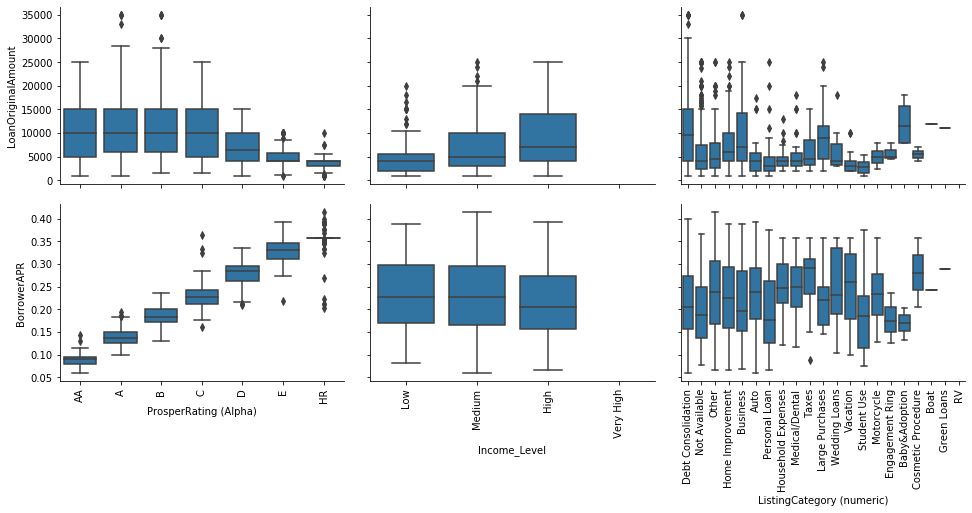

In [402]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(loan.shape[0], 2000, replace = False)
loan_samp = loan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation= 90)
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = categoric_vars,
                size = 3, aspect = 1.5 )
g.map(boxgrid)

plt.show();

It is very intresting find out better the prosper rating, lower the APR. Baby Adoption loans has lower APR compared to other loans. Higher income groups tend to take higher loan amounts, and they get lower APR. 

Finally, let's look at relationships between the three categorical features.

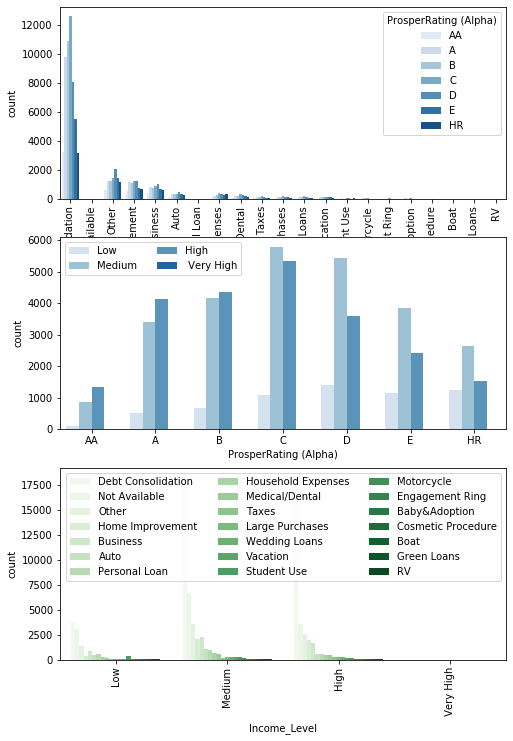

In [403]:

categoric_vars = ['ListingCategory (numeric)', 'ProsperRating (Alpha)', 'Income_Level']
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 12])

# subplot 1: Listing Category vs Prosper Rating
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'ListingCategory (numeric)', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xticks(rotation= 90)

# subplot 2: Prosper rating vs income Level
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'Income_Level', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: Income Level vs Listing Category
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'Income_Level', hue = 'ListingCategory (numeric)', palette = 'Greens')
ax.legend(loc = 1, ncol = 3) # re-arrange legend to remove overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

The propotion of loan taken by groups of each prospr rating in not clear. However we get the idea, that most of the loans are for debt consolidation and all groups of propser rating has taken different types of loans. 

Higher income groups tend to have higher prosper raitngs. 

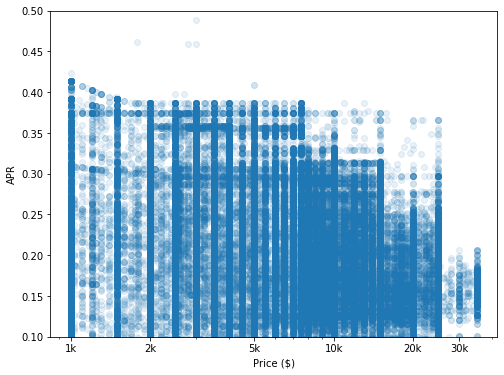

In [404]:
# Log transfor of original loan amount on x axis vs the apr 

plt.figure(figsize = [8, 6])
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.ylim([0.1, 0.5])
plt.ylabel('APR')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])
plt.xlabel('Price ($)')
plt.show()

For very high loans, APR tends to be very low. For very low loans aor tends to be very high. 

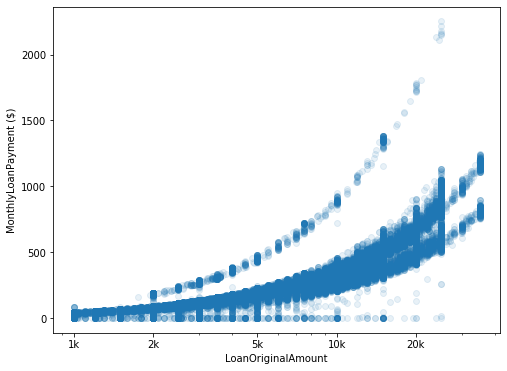

In [405]:
# Correlation for montly payment and original loan amount. 
plt.figure(figsize = [8, 6])
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 1/10)
plt.xlabel('LoanOriginalAmount')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.ylabel('MonthlyLoanPayment ($)')
plt.show()

There is a linear relationship between both.

Relationship of loan amount on the three categorical variables

In [413]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

loan['log_loanOrginal'] = loan['LoanOriginalAmount'].apply(log_trans)

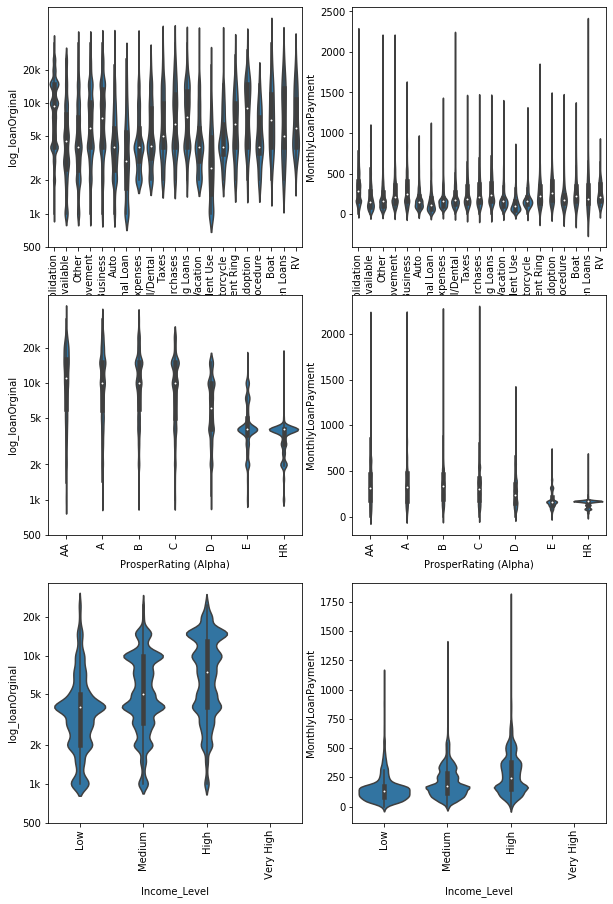

In [414]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loan, x = var, y = 'log_loanOrginal', ax = ax[i,0],
               color = default_color)

    ax[i,0].set_xticklabels(ax[i,0].get_xticklabels(), rotation=90)
    ax[i,1].set_xticklabels(ax[i,0].get_xticklabels(), rotation=90)

    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = loan, x = var, y = 'MonthlyLoanPayment', ax = ax[i,1],
               color = default_color)


plt.show()

This violin plots reveals much more information. Low income level gets Lower amount loans. Higher the prosper rating higher the amount of loan. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The loan orginal amount is dependant all three categorical variables. Higher the prosper rating, higher the original loan amount. Differrent types of loan had different original amount. High income groups tends to take higher loan amounts .

The APR is dependant on all the other factors. Propser rating is the major factor. The people with higher prosper rating has very low APR irrespective of all other factors. Higher income groups tend to have higher propser rating and they tend to take higher loan amounts with lower  APR. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Irrepective of the income level, debt consolidation seems to be major laon type. Its intresting people tend to take more loans to cover other loans. 


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures play into the relationship between Loan Amount and APR.

In [408]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
    bins_x = np.arange(1000, loan.LoanOriginalAmount.max()+200, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
   

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


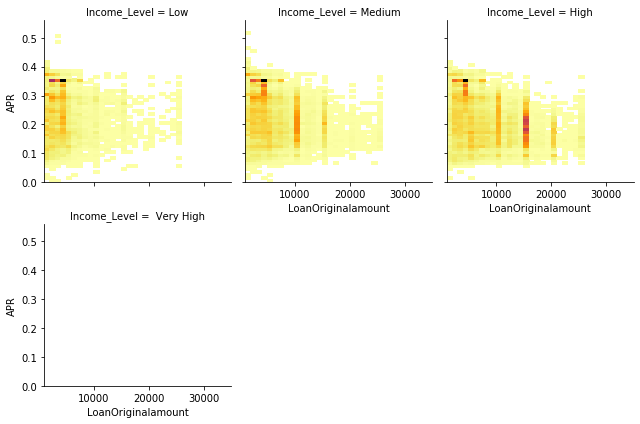

In [409]:
# create faceted heat maps on levels of the Income Levels. 
g = sb.FacetGrid(data = loan, col = 'Income_Level', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanOriginalamount')
g.set_ylabels('APR')

plt.show()

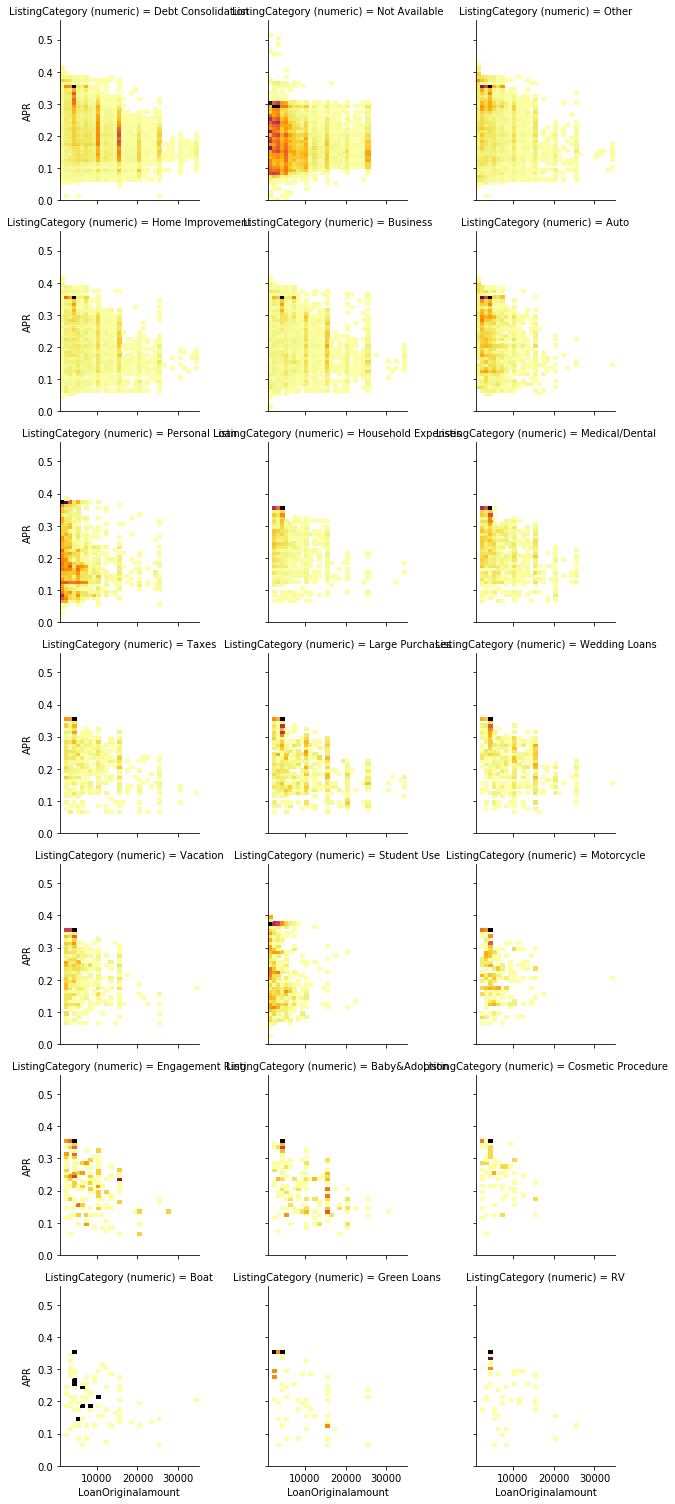

In [410]:
# create faceted heat maps on levels of the Listing Category. 
figsize = [12,15]
g = sb.FacetGrid(data = loan, col = 'ListingCategory (numeric)', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanOriginalamount')
g.set_ylabels('APR')

plt.show()

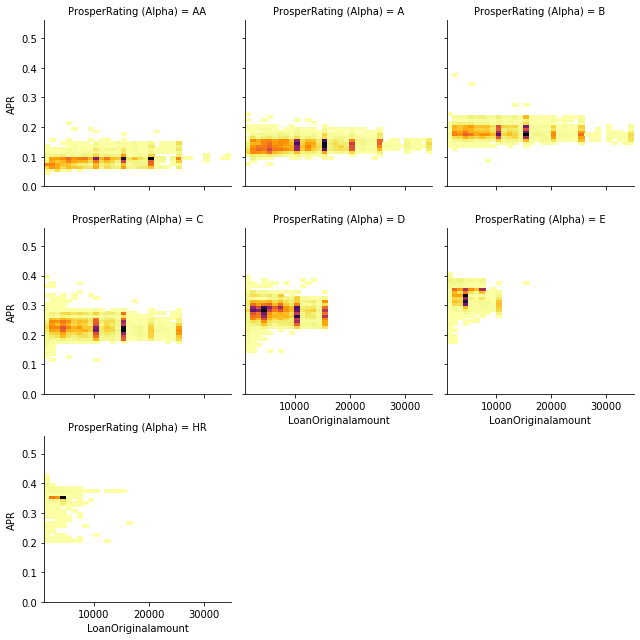

In [415]:
# create faceted heat maps on levels of Prosper rating. 
figsize = [12,15]
g = sb.FacetGrid(data = loan, col = 'ProsperRating (Alpha)', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanOriginalamount')
g.set_ylabels('APR')

plt.show()

In each of this multi variate exploration  we get more clarity of the relationship between Loan amount and APR on the other three categorial factors

Low income Levels, tend to take lowe loan amount and has high APR. High income Level when the loan amout increases, the APR decreases and darker areas tend to be in the right side. This gives further insight, Higher the loam amount lower the APR, other factors not taken into consideration. 

Particular type of laon is not a major factor in determing the APR. APR does not appear to be extreme for any particular type of loan. Points are spread across the plot for every type of loan. This indicates, there is no major contribution for type of loan to APR. The only trend we observe is higher the loan amount, lower the APR, which we have seen is becuase of other factors. 

Prosper rating has the determining factor for the apr, irrespective of all other factors, better the prosper rating, lower the APR. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Loan amount against APR in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased prosper rating on the APR.

### Were there any interesting or surprising interactions between features?

Prosper rating stands out as the major factor for the variation in APR.